# Expectation for a ToF spectrum of a $^{252}$Cf spectrum 
last edit Jan-10, 2022

## Imports and definitions

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
main_data_path = '/Users/erezcohen/Desktop/data/PETsys/BoxSi_proto2.2/vth_1PE/ToF_measurements/'

## Sample En from a random distribution function


In [35]:
def Cf252_En_distribution( En ):
    # Amer. Jour. Physi. 81(2):112-119
    return np.exp(-0.88*En)*np.sinh(np.sqrt(2*En))


Ymax = np.max(Cf252_En_distribution( np.linspace(0, 10, 100) ));
def Sample_En( En_min = 0.0, En_max = 10.0 , NattemptMax=1000 ):#{
    # sample En from Cf252 distribution in [MeV]
    n = 1
    while n < NattemptMax:#{
        # sample En from a uniform distribution
        En = np.random.uniform(low=En_min, high=En_max)
        # sample Y from a uniform distribution up to Ymax
        Y  = np.random.uniform(low=0,      high=Ymax)
        # keep En if Y is below Cf distribution value for En
        if Y < Cf252_En_distribution( En ):#{
            return En
        #}        
        n = n+1;
    #}
    return -1;
#}

In [83]:
N = 50000
En = np.array([Sample_En() for i in range(N)])

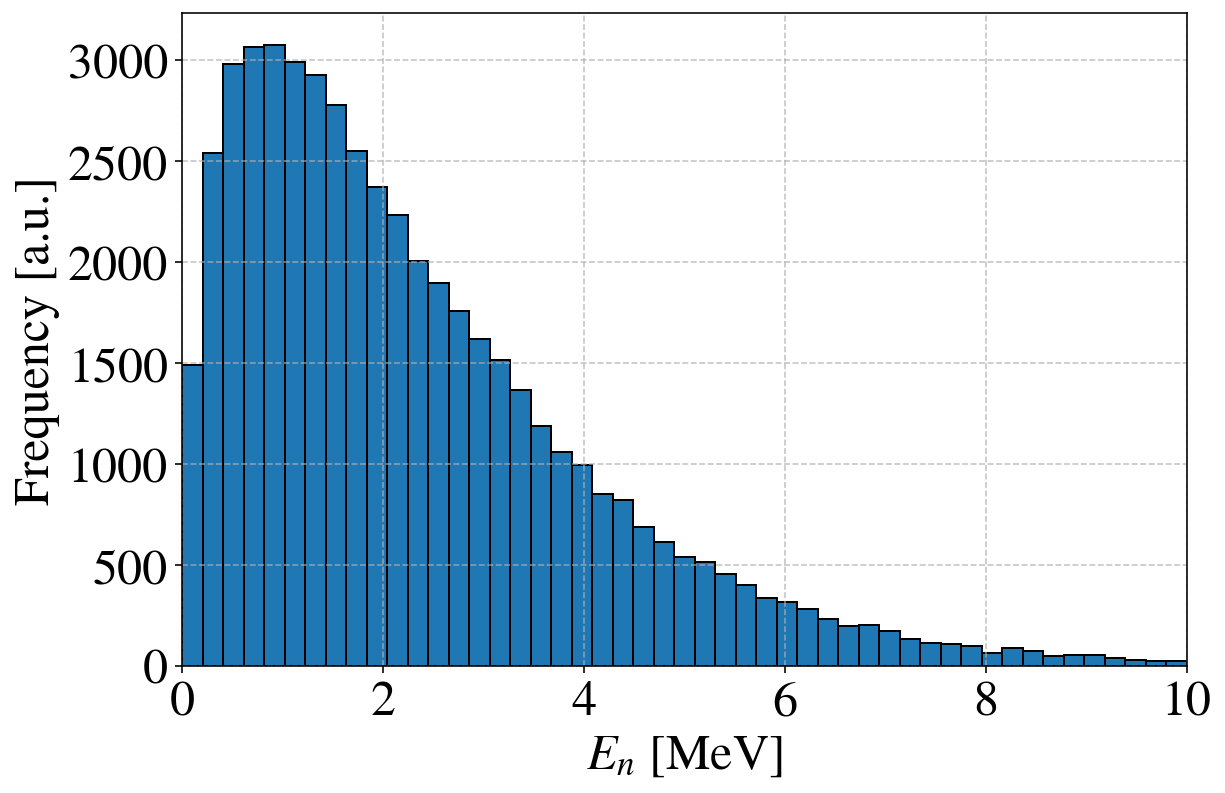

In [84]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
plt.hist( En, edgecolor='k', bins=np.linspace(0,10,50) )
set_axes( ax, '$E_n$ [MeV]', 'Frequency [a.u.]', do_add_grid=True , xlim=(0,10));

### Add detection threshold as minimal allowed neutron energy

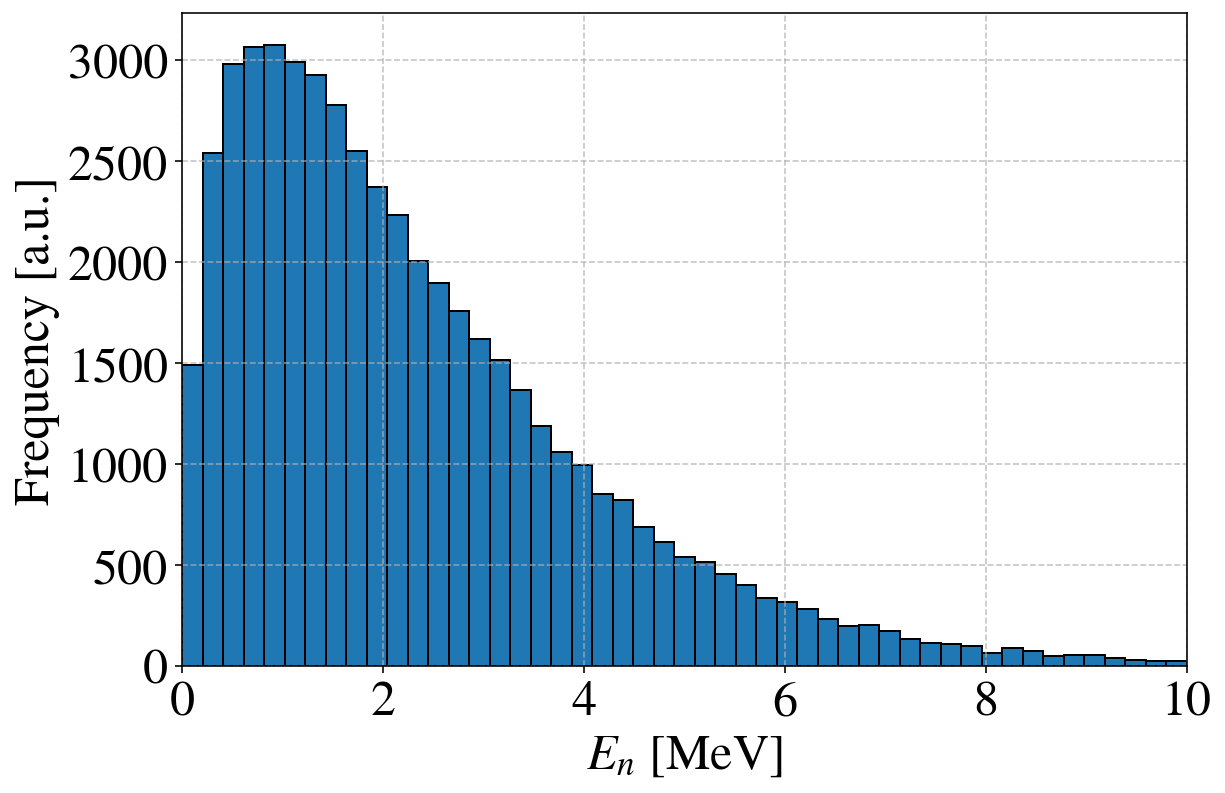

In [85]:
En_min = 1.6 # MeV
En_detectable = En[En > En_min]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
plt.hist( En, edgecolor='k', bins=np.linspace(0,10,50) )
set_axes( ax, '$E_n$ [MeV]', 'Frequency [a.u.]', do_add_grid=True , xlim=(0,10));

## Calculate neutron ToF spectrum
For a given travel distance

In [86]:
d   = 44    # cm
c   = 30.   # cm/ns
m_n = 939.656 # MeV/c2

gamma_n = (En + m_n) / m_n
beta_n  = np.sqrt(1 - 1./np.square(gamma_n))
v_n     = beta_n * c
ToF_n   = d / v_n

gamma_n_detectable = (En_detectable + m_n) / m_n
beta_n_detectable  = np.sqrt(1 - 1./np.square(gamma_n_detectable))
v_n_detectable     = beta_n_detectable * c
ToF_n_detectable   = d / v_n_detectable



### Add $\gamma$ ToF

In [87]:
ToF_gamma   = d / c

### Give relative weight to the $\gamma$ and neutrons according to their multiplicities from $^{252}$Cf fission

In [89]:
# no need to be accurate here, only sort of
NgammasAvg   = 88;
NneutronsAvg = 2.76;

ToF_gamma = ToF_gamma * np.ones( int(NgammasAvg/NneutronsAvg * len(En)) )

ToF_252Cf = np.concatenate([ToF_gamma,ToF_n_detectable])
ToF_252Cf

array([ 1.46666667,  1.46666667,  1.46666667, ..., 15.19836216,
       21.18861314, 21.90751653])

#### smear the ToF by a $1$ ns Gaussian to emulate finite resolution from scintillation and electronics

In [90]:
sigma = 1 # ns
ToF_252Cf_smeared = np.array([ np.random.normal(loc=ToF, scale=sigma) for ToF in ToF_252Cf])

### Plot ToF spectrum for $\gamma$s and neutrons

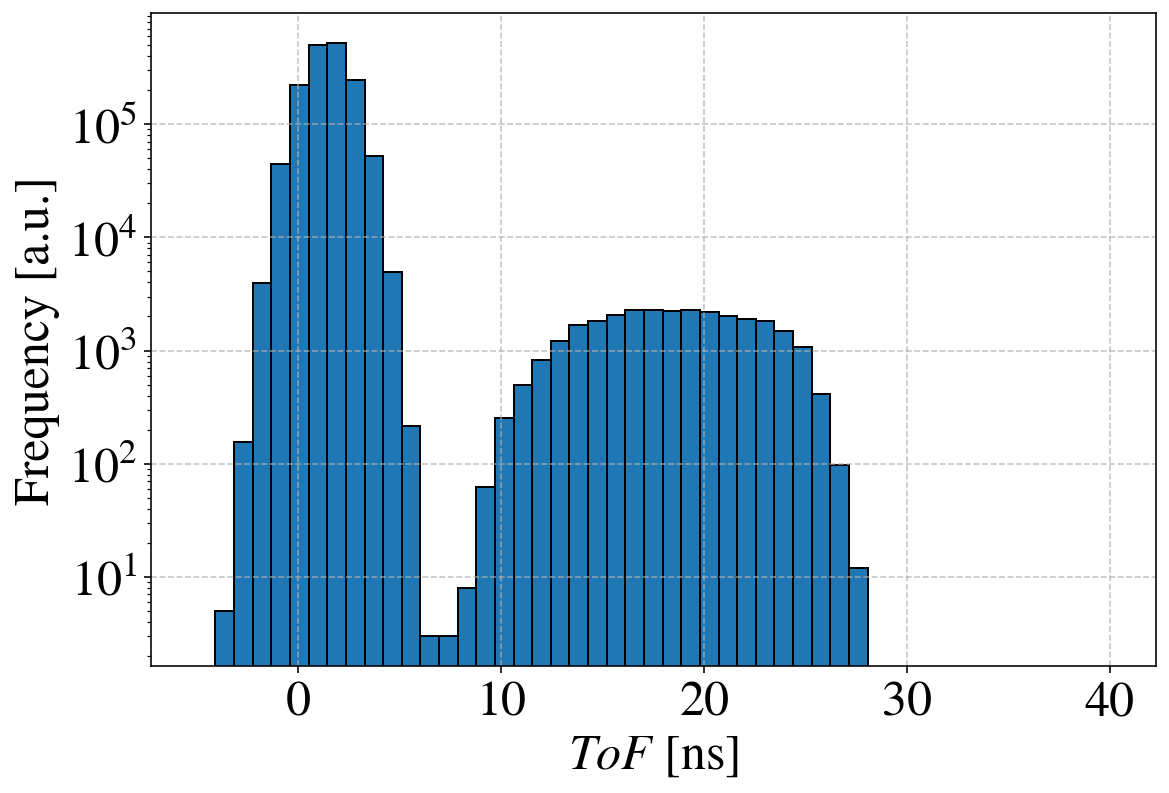

In [95]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
plt.hist( ToF_252Cf_smeared, edgecolor='k', bins=np.linspace(-5,40,50) )
set_axes( ax, '$ToF$ [ns]', 'Frequency [a.u.]', do_add_grid=True );#, xlim=(-10,150));
ax.set_yscale('log')